# DevDay 03: Apply and evaluate forecasting techniques
* Showcase the implementation of various forecasting methods using Python and popular libraries like pandas, scikit-learn, TensorFlow, or Prophet.
* Evaluate and compare the performance of each method on the chosen dataset.

In [27]:
import pandas as pd
import sys
import os

from typing import TypeVar, Any

import matplotlib.pyplot as plt 


sys.path.append(os.path.abspath(os.path.join(os.path.dirname("."), "..")))

# datasets
from data.airline_passengers import airline_passengers
from data.india_pollution import india_pollution
from data.electricity_consumption import energy_demand

from data.dataset import Dataset

# prediction methods
from predictions.AR import ar
from predictions.MA import ma
from predictions.HoltWinters import holt_winters
from predictions.ARIMA import arima
from predictions.SARIMA import sarima
from predictions.auto_arima import auto_arima
from predictions.linear_regression import linear_regression
from predictions.prophet import prophet
from predictions.SES import ses

from measurements.get_metrics import get_metrics

from plots.comparison_plot import comparison_plot

import pprint

import warnings

import logging


In [28]:
# Load datasets into memory
# This gives us a Dataset class object
airline_passengers_dataset = airline_passengers()

# Examine Dataset class object
pprint.pprint(airline_passengers_dataset.__dict__)


{'name': 'Airline passengers',
 'number_columns': ['passengers'],
 'seasonality': True,
 'subset_column_name': 'passengers',
 'subset_row_name': 'all',
 'time_unit': 'months',
 'values':             passengers
date                  
1949-01-31       112.0
1949-02-28       118.0
1949-03-31       132.0
1949-04-30       129.0
1949-05-31       121.0
...                ...
1960-08-31       606.0
1960-09-30       508.0
1960-10-31       461.0
1960-11-30       390.0
1960-12-31       432.0

[144 rows x 1 columns]}


In [29]:
# Show the first 5 rows of the dataset
print(airline_passengers_dataset.values.head())

            passengers
date                  
1949-01-31       112.0
1949-02-28       118.0
1949-03-31       132.0
1949-04-30       129.0
1949-05-31       121.0


In [30]:
def plot_dataset(dataset: Dataset):
    plt.plot(dataset.values)
    plt.title(dataset.name)
    plt.ylabel(dataset.subset_column_name)
    plt.xlabel(dataset.values.index.name)
    plt.show()

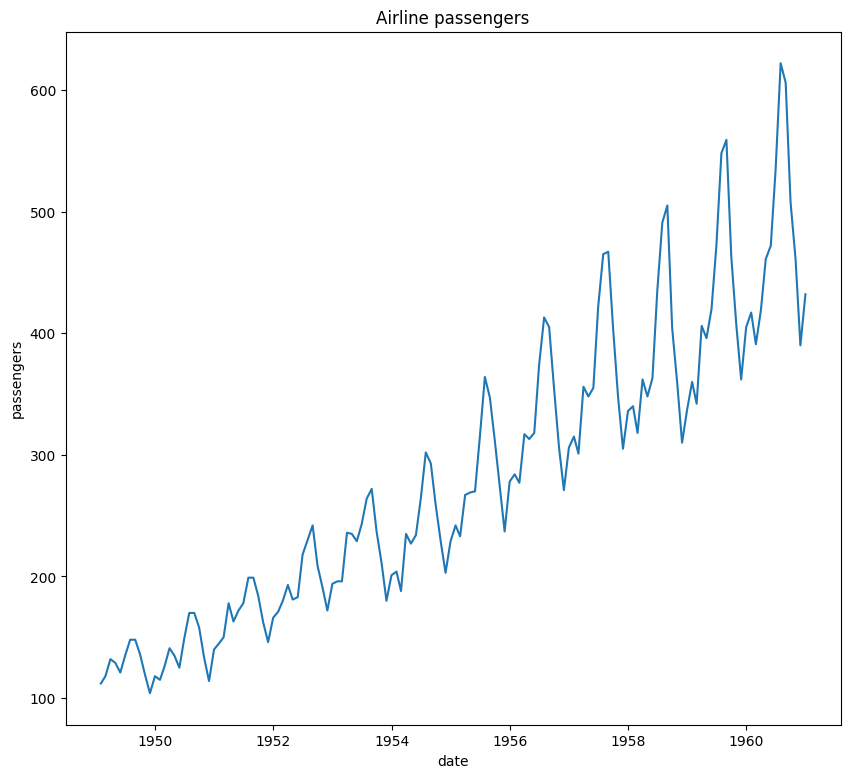

In [31]:
plot_dataset(airline_passengers_dataset)

# Apply grid search

Here we are going to use the **grid search** method to find the best parameters for the ARIMA model. We will use the BIC metric to find the best parameters.

**BIC, or Bayesian Information Criterion**, is a metric that is used to compare models. It is based on the likelihood function and the number of parameters in the model. The lower the BIC, the better the model.



In [33]:
# Split the dataset into train and test sets
# Train an AR model on the train set
# Predict on the test set with certain parameters
# Evaluate the model using BIC to find the best model

warnings.filterwarnings('ignore')
logging.getLogger().setLevel(logging.INFO)

prediction = arima(airline_passengers_dataset)

INFO:root:ARIMA(0, 0, 0) Trend=c BIC=1368.6788575693633
INFO:root:ARIMA(0, 0, 0) Trend=t BIC=1239.135454132731
INFO:root:ARIMA(0, 0, 0) Trend=ct BIC=924.4521928672852
INFO:root:ARIMA(0, 0, 1) Trend=c BIC=1223.66789983314
INFO:root:ARIMA(0, 0, 1) Trend=t BIC=1103.2778454846664
INFO:root:ARIMA(0, 0, 1) Trend=ct BIC=846.3224506523777
INFO:root:ARIMA(0, 0, 2) Trend=c BIC=1113.3875498159425
INFO:root:ARIMA(0, 0, 2) Trend=t BIC=1028.7904272019512
INFO:root:ARIMA(0, 0, 2) Trend=ct BIC=791.2876762898783
INFO:root:ARIMA(0, 0, 4) Trend=c BIC=983.3082667337512
INFO:root:ARIMA(0, 0, 4) Trend=t BIC=900.466498752505
INFO:root:ARIMA(0, 0, 4) Trend=ct BIC=763.5658341476087
INFO:root:ARIMA(0, 0, 8) Trend=c BIC=915.1311697860161
INFO:root:ARIMA(0, 0, 8) Trend=t BIC=851.4700808566278
INFO:root:ARIMA(0, 0, 8) Trend=ct BIC=753.8787018382367
INFO:root:ARIMA(0, 0, 10) Trend=c BIC=905.3358100842368
INFO:root:ARIMA(0, 0, 10) Trend=t BIC=845.6642409370331
INFO:root:ARIMA(0, 0, 10) Trend=ct BIC=755.0704204393328

In [34]:
# Take a look at the prediction object returned by the model

# Show all keys in the prediction object
print(prediction.__dict__.keys(), "\n\n")

# pretty print the contents, shortening the longer lists and series
pprint.pprint(prediction.__dict__, width=1)



dict_keys(['method_name', 'values', 'prediction_column_name', 'ground_truth_values', 'confidence_columns', 'title', 'plot_folder', 'plot_file_name', 'model_config', 'number_of_iterations', 'confidence_on_mean', 'confidence_method', 'color', 'in_sample_prediction']) 


{'color': 'orange',
 'confidence_columns': ['mean_ci_lower',
                        'mean_ci_upper'],
 'confidence_method': '95% '
                      'confidence '
                      'interval',
 'confidence_on_mean': True,
 'ground_truth_values': date
1958-09-30    404.0
1958-10-31    359.0
1958-11-30    310.0
1958-12-31    337.0
1959-01-31    360.0
1959-02-28    342.0
1959-03-31    406.0
1959-04-30    396.0
1959-05-31    420.0
1959-06-30    472.0
1959-07-31    548.0
1959-08-31    559.0
1959-09-30    463.0
1959-10-31    407.0
1959-11-30    362.0
1959-12-31    405.0
1960-01-31    417.0
1960-02-29    391.0
1960-03-31    419.0
1960-04-30    461.0
1960-05-31    472.0
1960-06-30    535.0
1960-07-31    622.0
1960-08-31 

In [35]:
# Evaluate the ARIMA model using RMSE, MAE, and MAPE

metrics = get_metrics(prediction)

pprint.pprint(metrics)

{'mean_absolute_error': 23.09,
 'mean_absolute_percentage_error': 4.97,
 'r_squared': 0.87,
 'root_mean_squared_error': 28.72}


INFO:root:

Plotting passengers forecast for all with ARIMA with pre-defined confidence intervals


INFO:root:

Plotting passengers forecast for all with ARIMA with pre-defined confidence intervals




Saving comparison plot for passengers forecast for all with ARIMA to Airline passengers/all/ARIMA/passengers_forecast_AR1_I1_MA0.png
Saving full plot for passengers forecast for all with ARIMA to Airline passengers/all/ARIMA/passengers_forecast_AR1_I1_MA0.png


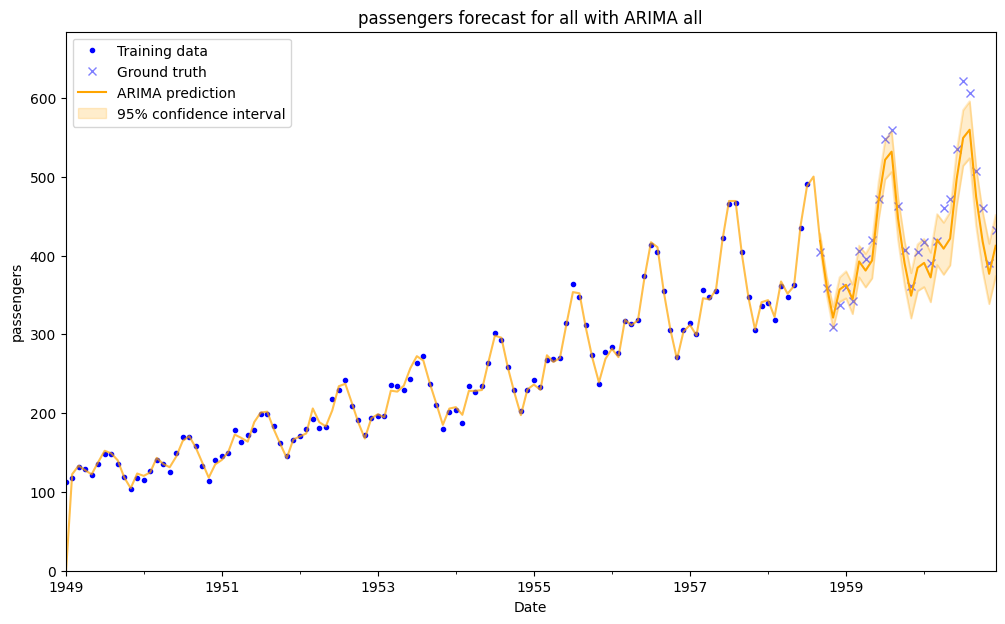

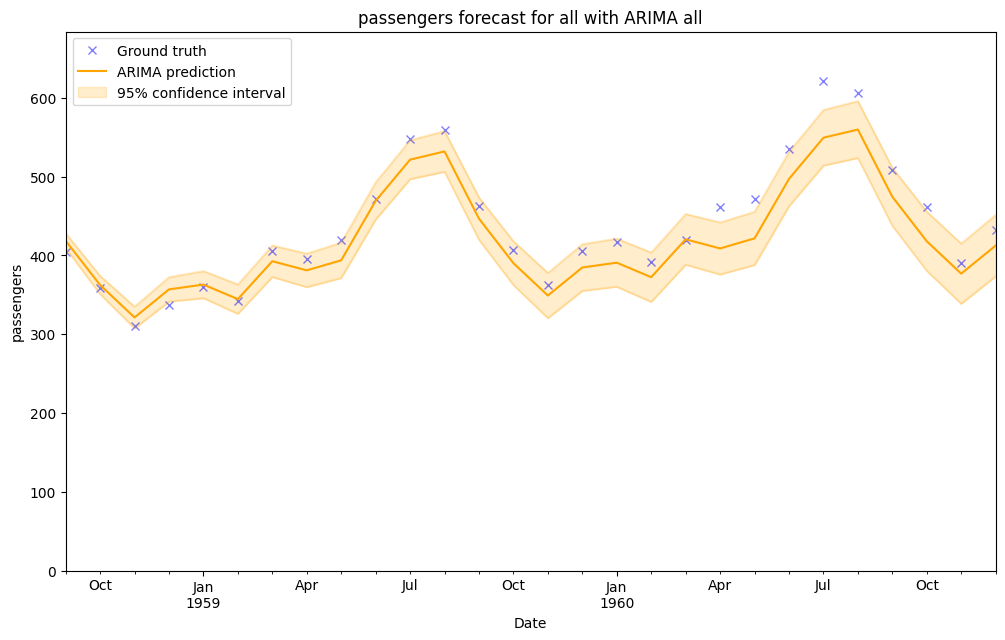

In [36]:
# get the training data

test_split = 0.2

last_index_train = int(len(airline_passengers_dataset.values) * (1 - test_split))

training_data = airline_passengers_dataset.values[:last_index_train]

# plot the training data and the prediction

comparison_plot_figure = comparison_plot(
    training_data,
    prediction,
)


# Take Two, this time with SARIMA

In [37]:
# Trying out different models: SARIMA

prediction = sarima(airline_passengers_dataset)
metrics = get_metrics(prediction)

pprint.pprint(metrics)

INFO:root:Starting SARIMA prediction
INFO:root:Finding the best SARIMA model
INFO:root:Data Airline passengers is not stationary
INFO:root:Using differencing term from grid search
INFO:root: > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 1610.661 BIC
INFO:root: > Model[[(0, 0, 0), (0, 0, 1, 12), 'n']] 1352.907 BIC
INFO:root: > Model[[(0, 0, 0), (0, 0, 2, 12), 'n']] 1139.238 BIC
INFO:root: > Model[[(0, 0, 0), (0, 1, 0, 12), 'n']] 1018.831 BIC
INFO:root: > Model[[(0, 0, 0), (0, 1, 1, 12), 'n']] 868.607 BIC
INFO:root: > Model[[(0, 0, 0), (0, 1, 2, 12), 'n']] 732.178 BIC
INFO:root: > Model[[(0, 0, 0), (1, 0, 0, 12), 'n']] 874.791 BIC
INFO:root: > Model[[(0, 0, 0), (1, 0, 1, 12), 'n']] 862.277 BIC
INFO:root: > Model[[(0, 0, 0), (1, 0, 2, 12), 'n']] 771.997 BIC
INFO:root: > Model[[(0, 0, 0), (1, 1, 0, 12), 'n']] 828.164 BIC
INFO:root: > Model[[(0, 0, 0), (1, 1, 1, 12), 'n']] 789.710 BIC
INFO:root: > Model[[(0, 0, 0), (1, 1, 2, 12), 'n']] 690.120 BIC
INFO:root: > Model[[(0, 0, 0), (2, 0, 0, 12), 'n

{'mean_absolute_error': 14.29,
 'mean_absolute_percentage_error': 3.39,
 'r_squared': 0.95,
 'root_mean_squared_error': 17.42}


INFO:root:

Plotting passengers forecast for all for the next 28 months with SARIMA without pre-defined confidence intervals


INFO:root:

Plotting passengers forecast for all for the next 28 months with SARIMA without pre-defined confidence intervals




Saving comparison plot for passengers forecast for all for the next 28 months with SARIMA to Airline passengers/all/SARIMA/passengers_forecast_ar_0_trend_0_ma_2_seasonal_ar_12_seasonal_ma_24_exog_0.png
Saving full plot for passengers forecast for all for the next 28 months with SARIMA to Airline passengers/all/SARIMA/passengers_forecast_ar_0_trend_0_ma_2_seasonal_ar_12_seasonal_ma_24_exog_0.png


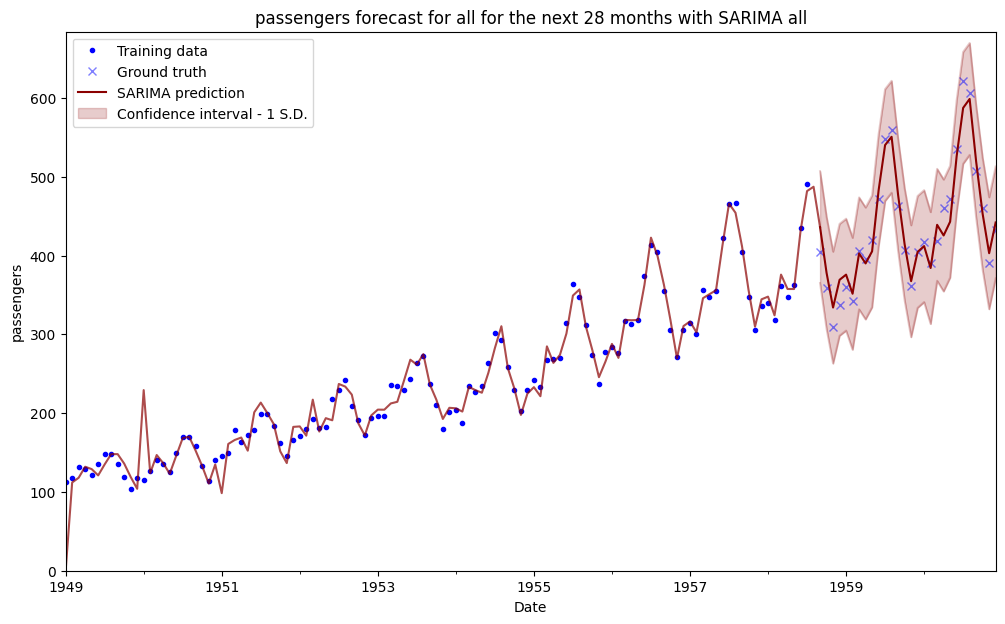

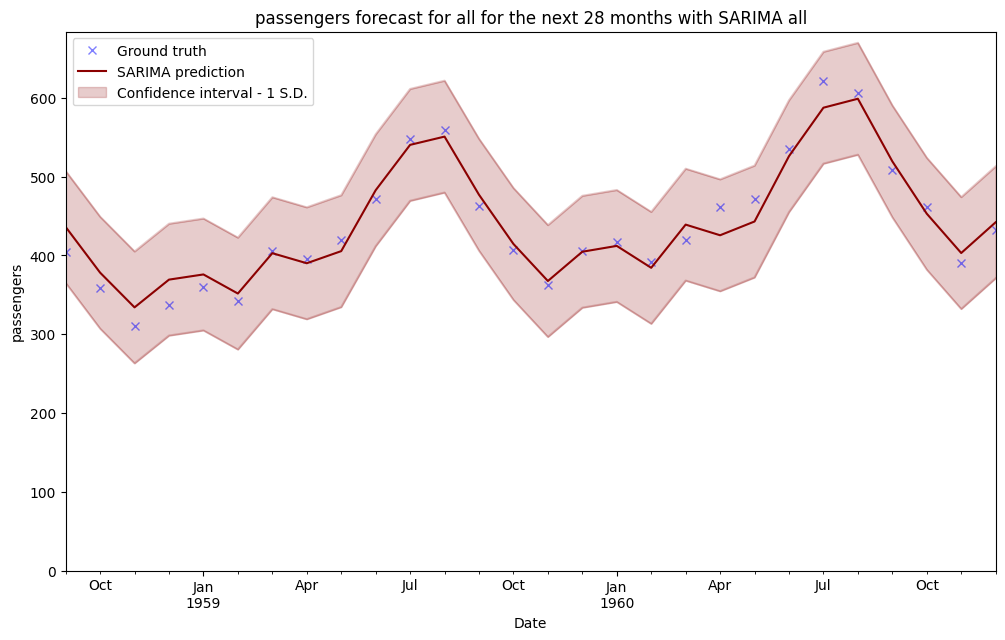

In [38]:
# get the training data

test_split = 0.2

last_index_train = int(len(airline_passengers_dataset.values) * (1 - test_split))

training_data = airline_passengers_dataset.values[:last_index_train]


comparison_plot_figure = comparison_plot(
    training_data,
    prediction,
)

# Try with a harder, real-world dataset

In [39]:
# Try with a harder dataset: India Pollution in Bangalore

india_pollution_dataset = next(india_pollution(city_list=["Bengaluru"]))

# Examine Dataset class object
pprint.pprint(india_pollution_dataset.__dict__)


INFO:root:Path /Users/frankkelly/Dropbox/Projects-new/india_air_pollution_study/data/air-quality-data-in-india exists
INFO:root:Getting list of city names
INFO:root:Path /Users/frankkelly/Dropbox/Projects-new/india_air_pollution_study/data/air-quality-data-in-india exists
INFO:root:Imputing data for columns ['PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']
INFO:root:columns present: Index(['PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2'], dtype='object')
INFO:root:Shape of dataframe before imputation: (2009, 6)
INFO:root:Column PM2.5 has 146; more than 5% missing values, less than 50%, so advanced imputation is necessary
INFO:root:Column PM10 has 360; more than 5% missing values, less than 50%, so advanced imputation is necessary
INFO:root:Column O3 has 144; more than 5% missing values, less than 50%, so advanced imputation is necessary
INFO:root:Column CO has 11; less than 5% missing values, so only simple imputation is necessary
INFO:root:Column SO2 has 6; less than 5% missing values, so only si

Imputing data


INFO:root:Shape of dataframe after imputation: (2009, 6)


{'name': 'Indian city pollution',
 'number_columns': ['PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2'],
 'seasonality': True,
 'subset_column_name': 'PM2.5',
 'subset_row_name': 'Bengaluru',
 'time_unit': 'weeks',
 'values':                 PM2.5       PM10         O3        CO        SO2        NO2
Date                                                                       
2015-01-04  19.595000  43.687500  15.807500  6.032500   6.910000  19.637500
2015-01-11  38.561429  80.742857  16.888571  1.561429   6.492857  27.168571
2015-01-18  23.045714  70.172857  16.485714  6.827143  13.562857  22.660000
2015-01-25  25.341429  52.921429  34.952857  6.372857  42.478571  12.630000
2015-02-01  33.560000  61.044286  21.145714  2.301429  10.921429  13.434286
...               ...        ...        ...       ...        ...        ...
2020-06-07  13.910000  33.535714  18.260000  0.602857   6.944286  12.977143
2020-06-14  19.160000  46.777143  15.257143  0.645714   7.024286  14.611429
2020-06-21  20.185714

In [40]:
# Show the first 5 rows of the dataset
print(india_pollution_dataset.values.head())

                PM2.5       PM10         O3        CO        SO2        NO2
Date                                                                       
2015-01-04  19.595000  43.687500  15.807500  6.032500   6.910000  19.637500
2015-01-11  38.561429  80.742857  16.888571  1.561429   6.492857  27.168571
2015-01-18  23.045714  70.172857  16.485714  6.827143  13.562857  22.660000
2015-01-25  25.341429  52.921429  34.952857  6.372857  42.478571  12.630000
2015-02-01  33.560000  61.044286  21.145714  2.301429  10.921429  13.434286


In [41]:
# Make a prediction using ARIMA

prediction = arima(india_pollution_dataset)
metrics = get_metrics(prediction)

pprint.pprint(metrics)

INFO:root:ARIMA(0, 0, 0) Trend=c BIC=1779.0632037797127
INFO:root:ARIMA(0, 0, 0) Trend=t BIC=2030.3668102276865
INFO:root:ARIMA(0, 0, 0) Trend=ct BIC=1772.103688603586
INFO:root:ARIMA(0, 0, 1) Trend=c BIC=1729.6740587426623
INFO:root:ARIMA(0, 0, 1) Trend=t BIC=1892.4543574405338
INFO:root:ARIMA(0, 0, 1) Trend=ct BIC=1727.0686583206605
INFO:root:ARIMA(0, 0, 2) Trend=c BIC=1724.3566525973029
INFO:root:ARIMA(0, 0, 2) Trend=t BIC=1847.587615707018
INFO:root:ARIMA(0, 0, 2) Trend=ct BIC=1723.2465555998062
INFO:root:ARIMA(0, 0, 4) Trend=c BIC=1712.3811820423591
INFO:root:ARIMA(0, 0, 4) Trend=t BIC=1800.765683120407
INFO:root:ARIMA(0, 0, 4) Trend=ct BIC=1712.7170302602722
INFO:root:ARIMA(0, 0, 8) Trend=c BIC=1713.6745667929022
INFO:root:ARIMA(0, 0, 8) Trend=t BIC=1766.801177770069
INFO:root:ARIMA(0, 0, 8) Trend=ct BIC=1715.6595453587336
INFO:root:ARIMA(0, 0, 10) Trend=c BIC=1719.624412810751
INFO:root:ARIMA(0, 0, 10) Trend=t BIC=1762.6278050807737
INFO:root:ARIMA(0, 0, 10) Trend=ct BIC=1721.96

{'mean_absolute_error': 13.92,
 'mean_absolute_percentage_error': 57.51,
 'r_squared': -1.83,
 'root_mean_squared_error': 18.14}


In [42]:
# What does the prediction object look like?

pprint.pprint(prediction.__dict__, width=1)

{'color': 'orange',
 'confidence_columns': ['mean_ci_lower',
                        'mean_ci_upper'],
 'confidence_method': '95% '
                      'confidence '
                      'interval',
 'confidence_on_mean': True,
 'ground_truth_values': Date
2019-06-09    23.802857
2019-06-16    16.587143
2019-06-23    23.012857
2019-06-30    26.081429
2019-07-07    20.254286
2019-07-14    21.778571
2019-07-21    22.104286
2019-07-28    20.492857
2019-08-04    20.207143
2019-08-11    14.457143
2019-08-18    20.808571
2019-08-25    16.957143
2019-09-01    15.935714
2019-09-08    13.877143
2019-09-15    20.357143
2019-09-22    32.157143
2019-09-29    24.252857
2019-10-06    28.970000
2019-10-13    38.558571
2019-10-20    21.551429
2019-10-27    19.361429
2019-11-03    29.798571
2019-11-10    69.198571
2019-11-17    31.565714
2019-11-24    33.247143
2019-12-01    26.951429
2019-12-08    36.485714
2019-12-15    25.532857
2019-12-22    39.010000
2019-12-29    40.287143
2020-01-05    40.251

INFO:root:

Plotting PM2.5 forecast for Bengaluru with ARIMA with pre-defined confidence intervals


INFO:root:

Plotting PM2.5 forecast for Bengaluru with ARIMA with pre-defined confidence intervals




Saving comparison plot for PM2.5 forecast for Bengaluru with ARIMA to Indian city pollution/Bengaluru/ARIMA/PM2.5_forecast_AR0_I1_MA1.png
Saving full plot for PM2.5 forecast for Bengaluru with ARIMA to Indian city pollution/Bengaluru/ARIMA/PM2.5_forecast_AR0_I1_MA1.png


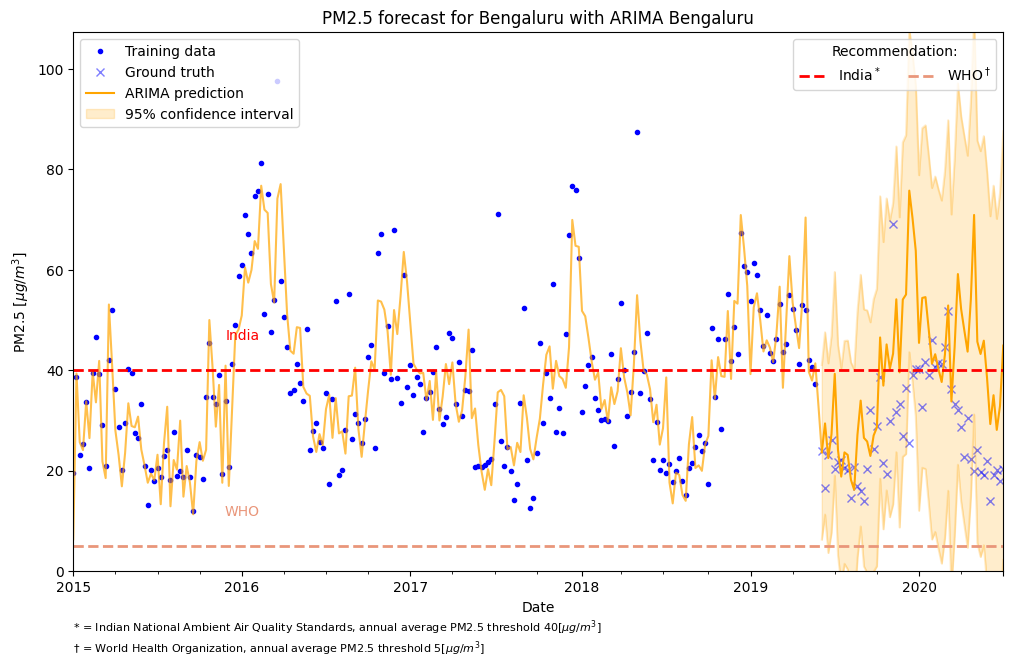

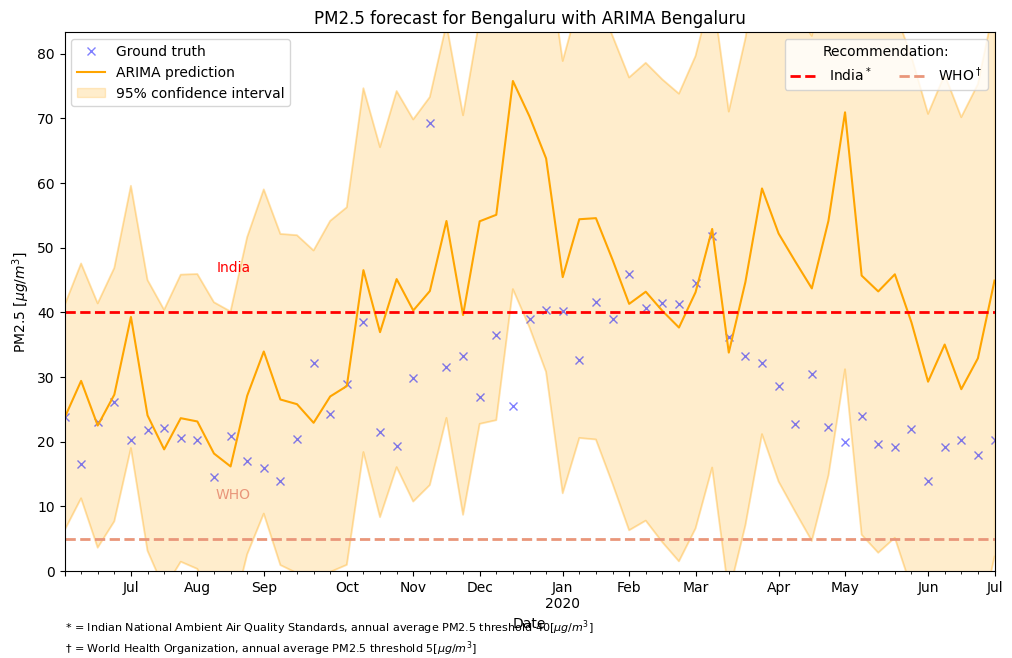

In [43]:
# get the training data

test_split = 0.2

last_index_train = int(len(india_pollution_dataset.values) * (1 - test_split))

training_data = india_pollution_dataset.values[:last_index_train]

# plot the training data and the prediction

comparison_plot_figure = comparison_plot(
    training_data,
    prediction,
)

In [44]:
# Try with an advanced model: Prophet

prediction = prophet(india_pollution_dataset)
metrics = get_metrics(prediction)

pprint.pprint(f"\n\nMetrics: {metrics}")

INFO:root:Seasonality range: [52, 51, 53]
INFO:root:holiday_df for Indian city pollution subset Bengaluru :            ds                   holiday
0  2015-01-14  Makar Sankranti / Pongal
1  2015-01-26              Republic Day
2  2015-03-06                      Holi
3  2015-05-01                Labour Day
4  2015-08-15          Independence Day
5  2015-10-02            Gandhi Jayanti
6  2015-11-01      Karnataka Rajyotsava
7  2015-11-11                    Diwali
8  2015-12-25                 Christmas
9  2016-01-14  Makar Sankranti / Pongal
10 2016-01-26              Republic Day
11 2016-03-24                      Holi
12 2016-05-01                Labour Day
13 2016-08-15          Independence Day
14 2016-10-02            Gandhi Jayanti
15 2016-10-30                    Diwali
16 2016-11-01      Karnataka Rajyotsava
17 2016-12-25                 Christmas
18 2017-01-14  Makar Sankranti / Pongal
19 2017-01-26              Republic Day
20 2017-03-13                      Holi
21 2017-05-0

Holidays for India (IN) - KA: {'observed': True, 'expand': True, 'subdiv': 'KA', 'years': set()}
Holidays df:           ds                   holiday
0 2015-01-14  Makar Sankranti / Pongal
1 2015-01-26              Republic Day
2 2015-03-06                      Holi
3 2015-05-01                Labour Day
4 2015-08-15          Independence Day
Holidays df after dropping na:           ds                   holiday
0 2015-01-14  Makar Sankranti / Pongal
1 2015-01-26              Republic Day
2 2015-03-06                      Holi
3 2015-05-01                Labour Day
4 2015-08-15          Independence Day
Holidays df after dropping duplicates:           ds                   holiday
0 2015-01-14  Makar Sankranti / Pongal
1 2015-01-26              Republic Day
2 2015-03-06                      Holi
3 2015-05-01                Labour Day
4 2015-08-15          Independence Day
Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  #

INFO:root:

Score: 12.080423064682899
INFO:root:New best score: 12.080423064682899
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       365.444    1.2164e-05       455.695      0.4283      0.4283      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       366.458   7.98848e-05       328.908       0.785       0.785      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     282       366.653     9.641e-09       430.651       0.279       0.279      346   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 12.088183048426913
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       372.108   1.10092e-05        81.485      0.8445      0.8445      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197       372.116   8.61681e-09       67.9719     0.04793           1      257   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 11.648172930799973
INFO:root:New best score: 11.648172930799973
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       368.047   4.23181e-06       95.1171   5.175e-08       0.001      157  LS failed, Hessian reset 
      99       368.047   1.41505e-07       63.0593      0.5201      0.5201      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       368.047   2.54227e-08       64.7284      0.6675      0.2434      182   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:root:

Score: 11.906512714743245
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       365.433    0.00541399       461.253           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176       367.231   4.01965e-09       509.542      0.2911      0.2911      210   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 12.066065506660474
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       365.437   1.04883e-05       462.221     0.06776           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       365.453   9.23063e-06       513.889   1.951e-08       0.001      180  LS failed, Hessian reset 
     169       365.457   4.04086e-09       464.576     0.06563     0.06563      254   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 12.136293415950211
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       372.079    4.3809e-06       66.5014      0.4123      0.4123      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       372.087   8.52319e-09       97.5111     0.00943     0.00943      235   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 11.64960008320448
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94       368.045   4.58082e-06       83.0879   5.279e-08       0.001      171  LS failed, Hessian reset 
      99       368.045   2.21222e-07       70.6622      0.5888      0.5888      176   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       368.046   5.57621e-09       63.8364      0.1214      0.1214      191   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 11.90662056110593
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       365.117   3.41136e-06       510.411           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     186       366.672   9.00921e-09       508.059      0.2273      0.2273      230   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 12.09347657287006
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       365.459   3.56577e-05       463.719           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       366.819   7.51523e-07       486.823      0.9121      0.9121      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237        366.82   6.34553e-09       494.293       0.156       0.156      286   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 12.081169962185896
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        372.11   4.35265e-05       69.4364      0.4254      0.4254      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       372.116   2.42302e-05       83.7106   3.022e-07       0.001      223  LS failed, Hessian reset 
     167       372.117   1.31694e-08       70.0837      0.1953      0.5298      258   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:root:

Score: 11.647631275250355
INFO:root:New best score: 11.647631275250355
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       368.045   8.69787e-08         70.75      0.2323       0.695      144   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       368.263   0.000972451       88.1582   1.194e-05       0.001      233  LS failed, Hessian reset 
     173       368.336   2.60244e-05       76.9168   3.282e-07       0.001      304  LS failed, Hessian reset 
     199       368.345    0.00199338       104.405           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       368.419    4.7636e-07       90.1839       0.572       0.572      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       371.931   2.07467e-05       57.9471           1           1      593   
    Iter      log pro

INFO:root:

Score: 11.411138026941178
INFO:root:New best score: 11.411138026941178
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       366.032    0.00431556         516.9      0.8054      0.8054      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       367.489   1.92378e-05       505.292   3.813e-08       0.001      234  LS failed, Hessian reset 
     183       367.496   8.90835e-09       509.732      0.2576      0.2576      267   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 12.056989976167866
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       366.268   0.000286783       522.816      0.1556           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     165        366.96    5.7586e-09       489.455       0.341       0.341      202   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 12.077918478796587
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       372.029   1.72955e-05       81.7046           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       372.044   7.88465e-05       94.4374   9.155e-07       0.001      172  LS failed, Hessian reset 
     143       372.051   1.38534e-05       87.3543   1.287e-07       0.001      247  LS failed, Hessian reset 
     168       372.052   1.84777e-08       91.1679       0.461       0.461      281   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:root:

Score: 11.675570882651177
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      46       367.744   0.000910302       88.3263   9.814e-06       0.001      108  LS failed, Hessian reset 
      97       367.837   6.81335e-06       88.4718    7.53e-08       0.001      213  LS failed, Hessian reset 
      99       367.837   3.88061e-06       78.0361           1           1      215   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       367.837   9.62886e-09       84.5293       0.208      0.5823      249   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 11.926261656361879
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       366.237    0.00145691       505.417           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       367.478   1.75837e-07       479.803      0.3994           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       367.478   6.02574e-09       476.836      0.1299      0.1299      253   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 12.055744272704963
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       366.249   0.000148823       528.459      0.6561      0.6561      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       366.547   6.02514e-07       456.764      0.9452      0.9452      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205        366.61   3.27399e-05       415.303   7.068e-08       0.001      294  LS failed, Hessian reset 
     274       366.632   6.80869e-09        479.42      0.6455      0.6455      376   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 12.102008139244289
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       372.041   0.000117035       106.604   1.159e-06       0.001      155  LS failed, Hessian reset 
      99        372.05     5.258e-06       89.0085      0.3927      0.3927      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       372.052   3.24228e-09       93.8924      0.1485      0.1485      240   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 11.675500530851995
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      46       367.744   0.000910654       88.3263   9.818e-06       0.001      104  LS failed, Hessian reset 
      92       367.836   2.41122e-06       81.7272    3.21e-08       0.001      198  LS failed, Hessian reset 
      99       367.837   2.43831e-07       86.3697       0.539       0.539      205   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       367.837   7.32554e-09       77.0444      0.2319           1      226   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 11.926275468769253
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       366.168    0.00307228       501.388           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       367.345   1.09053e-06       478.279   2.123e-09       0.001      266  LS failed, Hessian reset 
     199       367.346   2.00614e-08       461.247       0.287           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       367.346   7.96616e-09       483.023      0.5292      0.5292      291   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 12.063164004691698
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       366.253   0.000163409       498.817           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     193       366.995   5.96554e-09       501.802       0.345       0.345      231   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 12.08245730183171
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        372.03   1.93759e-05        88.788           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       372.042   0.000106362       85.9434   1.154e-06       0.001      176  LS failed, Hessian reset 
     144       372.051   8.98887e-09       75.7304      0.2773      0.7164      225   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 11.675523803223404
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Bengaluru
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.38489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      46       367.744   0.000909971       88.3264   9.811e-06       0.001      105  LS failed, Hessian reset 
      97       367.837   1.04746e-05       83.0105   1.147e-07       0.001      200  LS failed, Hessian reset 
      99       367.838   3.43262e-06       72.9397      0.8063      0.8063      202   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       367.838   1.73065e-08       78.8497       0.532       0.897      232   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:root:

Score: 11.926248870721638
INFO:root:

Best config: changepoint_range=0.5, seasonality_prior_scale=53, changepoint_prior_scale=0.05, seasonality_mode=multiplicative -> 11.411138026941178


('\n'
 '\n'
 "Metrics: {'root_mean_squared_error': 13.73, 'r_squared': -0.62, "
 "'mean_absolute_error': 11.04, 'mean_absolute_percentage_error': 44.66}")


INFO:root:

Plotting PM2.5 forecast for Bengaluru with Prophet with pre-defined confidence intervals


INFO:root:

Plotting PM2.5 forecast for Bengaluru with Prophet with pre-defined confidence intervals




Saving comparison plot for PM2.5 forecast for Bengaluru with Prophet to Indian city pollution/Bengaluru/Prophet/PM2.5_forecast.png
Saving full plot for PM2.5 forecast for Bengaluru with Prophet to Indian city pollution/Bengaluru/Prophet/PM2.5_forecast.png


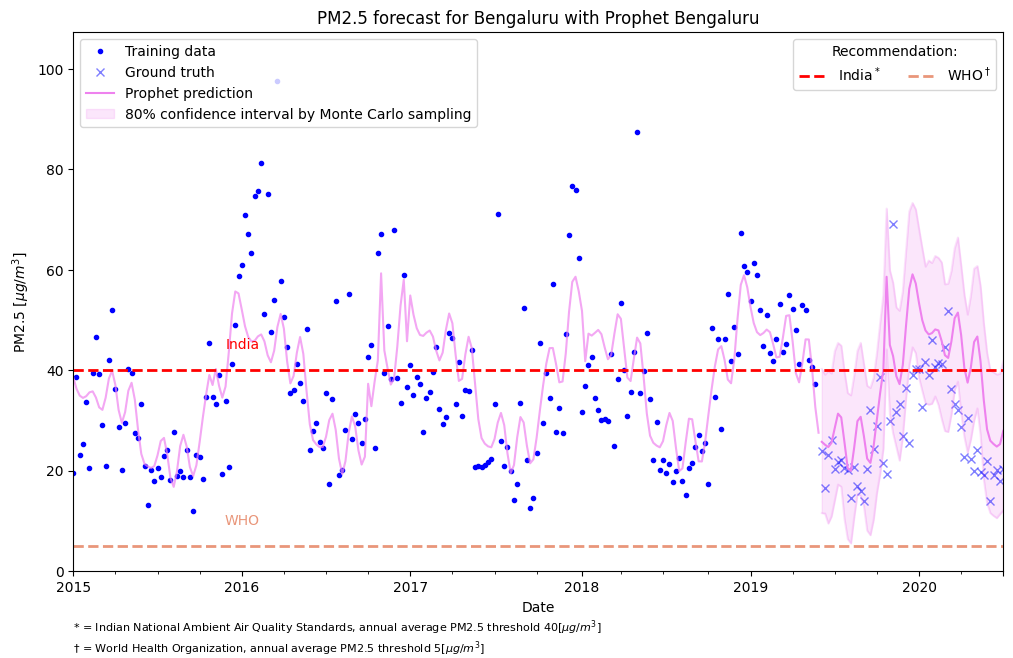

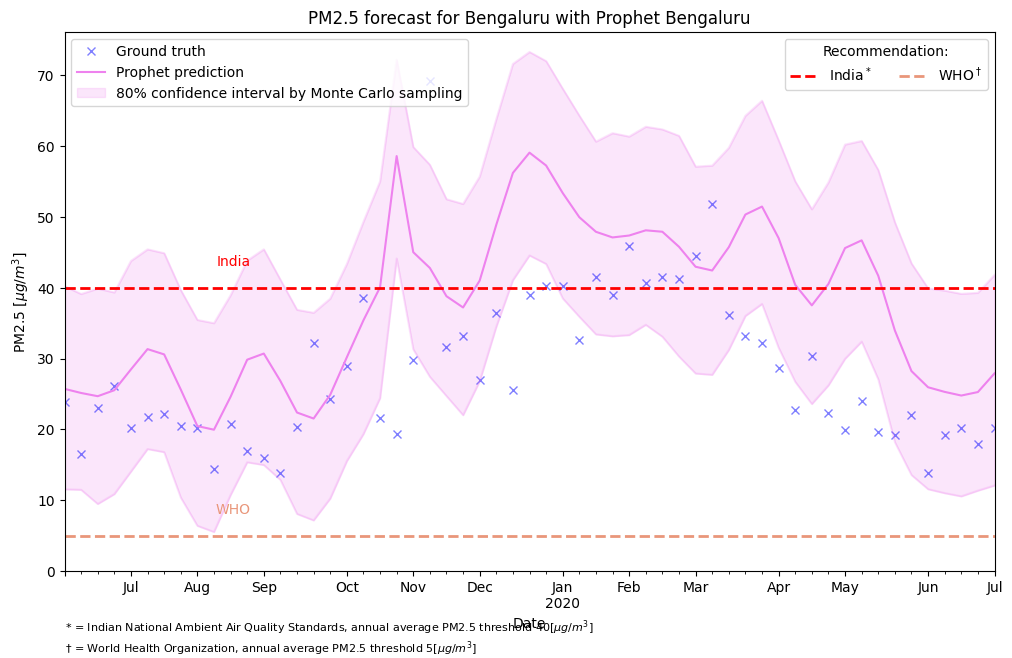

In [45]:
# Let's check the plot of the prediction

comparison_plot_figure = comparison_plot(
    training_data,
    prediction,
)

INFO:root:Decomposing Indian city pollution with STL
INFO:root:Performing STL decomposition
INFO:root:Seasonal component present: True for Indian city pollution
INFO:root:Seasonal period: 52
INFO:root:Storing plot of decomposition results
INFO:root:Fitting SES model to Indian city pollution
INFO:root:Calculating the next 57 trend values
INFO:root:Determining if seasonality is multiplicative
INFO:root:Seasonal period: 52
INFO:root:rolling max for Indian city pollution every 20: Date
2015-12-27          NaN
2016-05-15          NaN
2016-10-02          NaN
2017-02-19    60.218104
2017-07-09    34.031923
2017-11-26    34.031923
2018-04-15    42.527830
2018-09-02    51.096923
2019-01-20    51.096923
Freq: 20W-SUN, Name: PM2.5, dtype: float64
INFO:root:Detecting trend in PM2.5
INFO:root:42.45910659340659 47.22880769230769
INFO:root:absolutediff: 4.769701098901102
INFO:root:Multiplicative factor: 1.0008256323054687
INFO:root:Calculating the next 57 seasonal values
INFO:root:Sample of the next 

len seasonal_values_test
57


seasonal_component_in_sample tail: Date
2019-05-05    8.787497
2019-05-12    0.751191
2019-05-19    0.621843
2019-05-26   -6.990548
2019-06-02   -9.734227
Freq: W-SUN, Name: season, dtype: float64


next seasonal_component head: 231   -10.554076
232    -5.027502
233   -12.190543
234    -9.218462
235   -15.015639
Name: seasonal, dtype: float64


forecasted_resid_in_sample tail: 2019-05-12    51.753740
2019-05-19    43.540502
2019-05-26    43.002560
2019-06-02    35.909705
2019-06-09    33.322320
Freq: W-SUN, dtype: float64
forecasted_resid head: 2019-06-09    26.914930
2019-06-16    32.485158
2019-06-23    25.365771
2019-06-30    28.381506
2019-07-07    22.627982
Freq: W-SUN, dtype: float64
('\n'
 '\n'
 "Metrics: {'root_mean_squared_error': 14.65, 'r_squared': -0.84, "
 "'mean_absolute_error': 11.48, 'mean_absolute_percentage_error': 46.74}")


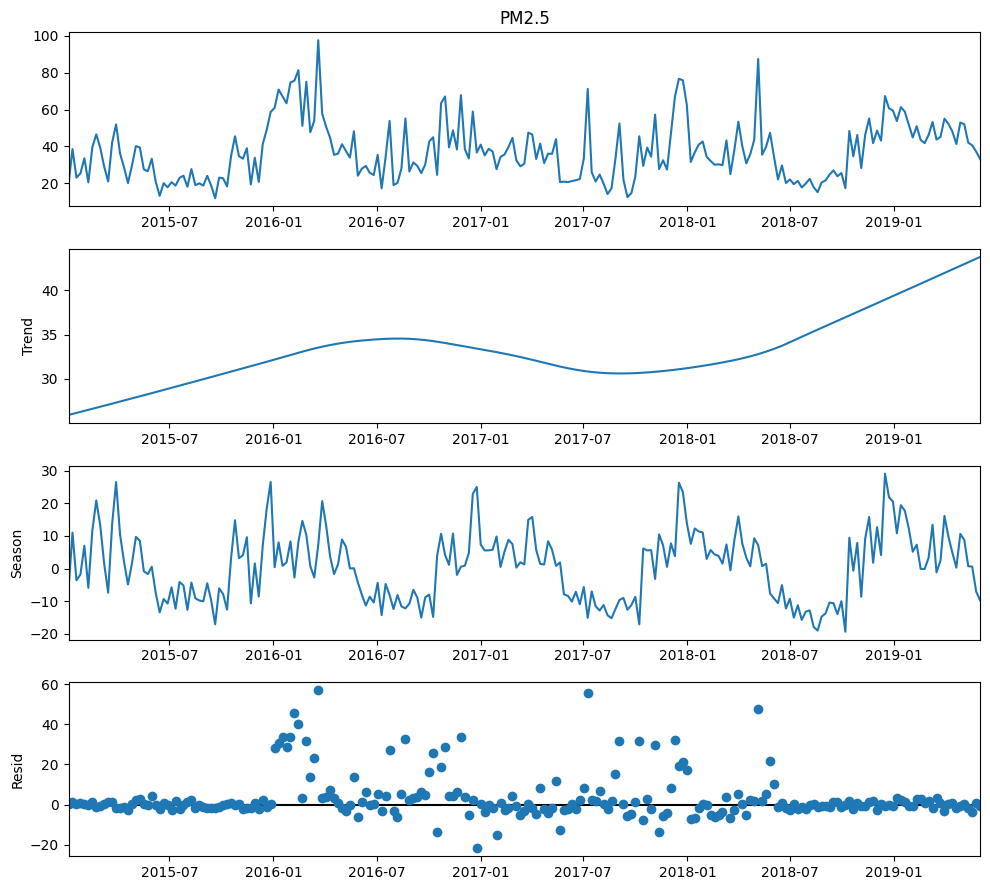

In [46]:
# Try with a foundational model: SES

prediction = ses(india_pollution_dataset)
metrics = get_metrics(prediction)

pprint.pprint(f"\n\nMetrics: {metrics}")

INFO:root:

Plotting PM2.5 forecast for Bengaluru with SES without pre-defined confidence intervals


INFO:root:

Plotting PM2.5 forecast for Bengaluru with SES without pre-defined confidence intervals




Saving comparison plot for PM2.5 forecast for Bengaluru with SES to Indian city pollution/Bengaluru/SES/PM2.5_forecast.png
Saving full plot for PM2.5 forecast for Bengaluru with SES to Indian city pollution/Bengaluru/SES/PM2.5_forecast.png


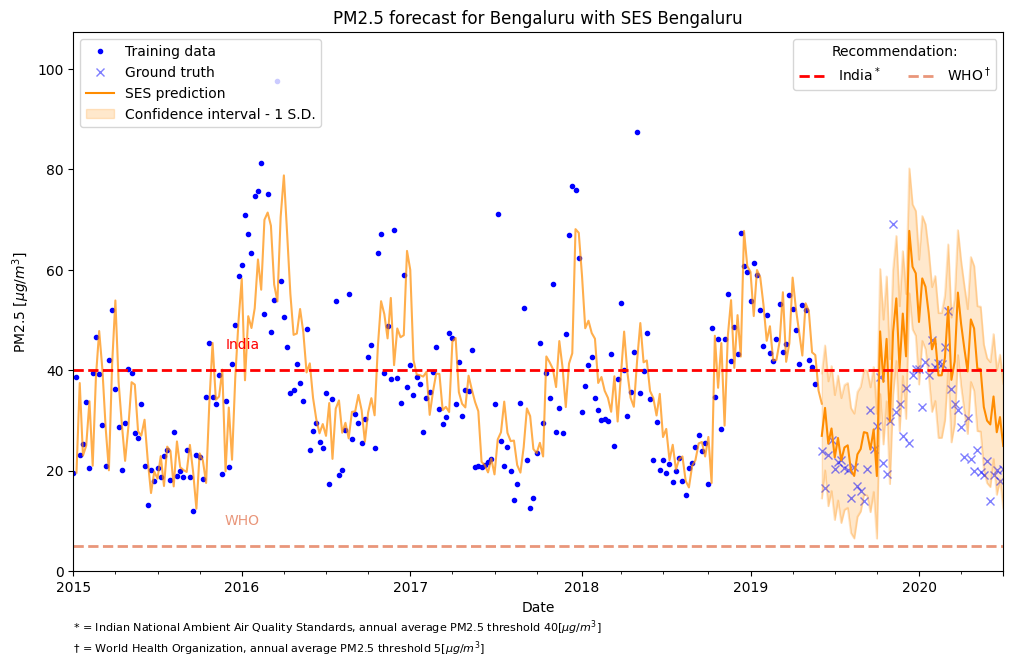

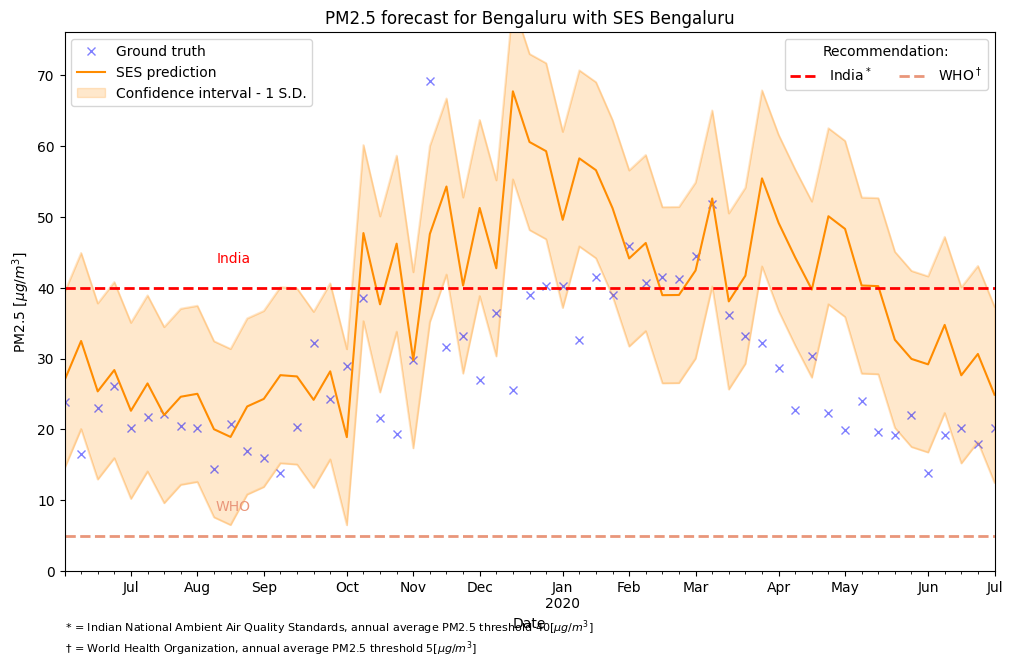

In [47]:
# plot the training data and the prediction

comparison_plot_figure = comparison_plot(
    training_data,
    prediction,
)

# The impact of COVID-19

* Lower PM 2.5 levels in Indian cities during COVID-19 lockdown

In [48]:
# Try Chennai instead of Bengaluru
# Try with an advanced model: Prophet

india_pollution_dataset = next(india_pollution(city_list=["Chennai"]))
prediction = prophet(india_pollution_dataset)
metrics = get_metrics(prediction)

pprint.pprint(f"\n\nMetrics: {metrics}")

INFO:root:Path /Users/frankkelly/Dropbox/Projects-new/india_air_pollution_study/data/air-quality-data-in-india exists
INFO:root:Getting list of city names
INFO:root:Path /Users/frankkelly/Dropbox/Projects-new/india_air_pollution_study/data/air-quality-data-in-india exists
INFO:root:Imputing data for columns ['PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']
INFO:root:columns present: Index(['PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2'], dtype='object')
INFO:root:Shape of dataframe before imputation: (2009, 6)
INFO:root:Column PM2.5 has 117; more than 5% missing values, less than 50%, so advanced imputation is necessary
INFO:root:Column PM10 has 1707; less than 5% missing values, so only simple imputation is necessary
INFO:root:Column O3 has 49; less than 5% missing values, so only simple imputation is necessary
INFO:root:Column CO has 25; less than 5% missing values, so only simple imputation is necessary
INFO:root:Column SO2 has 36; less than 5% missing values, so only simple imputation is nece

Imputing data


INFO:root:Shape of dataframe after imputation: (2009, 6)
INFO:root:Seasonality range: [52, 51, 53]
INFO:root:holiday_df for Indian city pollution subset Chennai :            ds                                            holiday
0  2015-01-14                           Makar Sankranti / Pongal
1  2015-01-26                                       Republic Day
2  2015-03-06                                               Holi
3  2015-04-14  Dr. B. R. Ambedkar's Jayanti, Puthandu (Tamil ...
4  2015-04-15                          Puthandu (Tamil New Year)
5  2015-05-01                                         Labour Day
6  2015-08-15                                   Independence Day
7  2015-10-02                                     Gandhi Jayanti
8  2015-11-11                                             Diwali
9  2015-12-25                                          Christmas
10 2016-01-14                           Makar Sankranti / Pongal
11 2016-01-26                                       Repub

Holidays for India (IN) - TN: {'observed': True, 'expand': True, 'subdiv': 'TN', 'years': set()}
Holidays df:           ds                                            holiday
0 2015-01-14                           Makar Sankranti / Pongal
1 2015-01-26                                       Republic Day
2 2015-03-06                                               Holi
3 2015-04-14  Dr. B. R. Ambedkar's Jayanti, Puthandu (Tamil ...
4 2015-04-15                          Puthandu (Tamil New Year)
Holidays df after dropping na:           ds                                            holiday
0 2015-01-14                           Makar Sankranti / Pongal
1 2015-01-26                                       Republic Day
2 2015-03-06                                               Holi
3 2015-04-14  Dr. B. R. Ambedkar's Jayanti, Puthandu (Tamil ...
4 2015-04-15                          Puthandu (Tamil New Year)
Holidays df after dropping duplicates:           ds                                        

INFO:root:

Score: 15.789780062762846
INFO:root:New best score: 15.789780062762846
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86        416.18   4.90197e-09       498.196      0.5112      0.5112      117   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.788750914118205
INFO:root:New best score: 15.788750914118205
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       419.653   6.06831e-05       66.9066      0.3141      0.9975      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       419.676   5.09646e-07       78.5501   6.573e-09       0.001      264  LS failed, Hessian reset 
     187       419.676   2.72493e-08       66.6862      0.4089           1      280   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:root:

Score: 15.505244338776192
INFO:root:New best score: 15.505244338776192
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      53       417.853   5.33646e-05       61.6339   1.089e-06       0.001      114  LS failed, Hessian reset 
      99       417.878   9.77191e-06        69.131           1           1      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       421.606   7.51729e-06       71.0317      0.3901           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     249       421.628   2.92278e-05       80.9474       4e-07       0.001      391  LS failed, Hessian reset 
     299       421.629    1.6009e-08       52.7601       0.389       0.389      468   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:root:

Score: 15.360557545962157
INFO:root:New best score: 15.360557545962157
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       416.249   1.84476e-08       473.909      0.4617           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       416.249   4.86683e-09       470.403      0.3287      0.3287      131   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.78974984470417
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77        416.18   6.34158e-09       507.882      0.3149      0.3149      105   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.788754547427185
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       419.601   0.000487761       70.7532      0.3822           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       419.606   1.69743e-05       71.1682   2.497e-07       0.001      249  LS failed, Hessian reset 
     181       419.607   3.15031e-09       69.8729      0.1161      0.1161      323   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.50367683611793
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       417.875   5.59859e-06       84.6422           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       420.547     0.0753565       95.3937      0.2797      0.8945      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       421.634   9.32101e-06       68.1981           1           1      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       421.652   3.37016e-08       53.6451           1           1      477   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:root:

Score: 15.349415335768196
INFO:root:New best score: 15.349415335768196
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       416.249   8.26257e-08       490.267      0.3438      0.3438      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       416.249   7.00633e-09       544.143      0.5463      0.5463      142   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.789676861968614
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81        416.18   7.52923e-09       498.941       0.405       0.405      105   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.788751767282735
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       419.635   1.31614e-05       66.9113           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       419.636   2.68864e-08       63.7384           1           1      175   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:root:

Score: 15.502958196202368
INFO:root:Trying config: 
{'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.5, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      54       417.852   8.63589e-05       55.2437   1.257e-06       0.001      115  LS failed, Hessian reset 
      84       417.875   2.07151e-05       66.2033   2.884e-07       0.001      191  LS failed, Hessian reset 
      99       417.876   5.70484e-07       73.8716      0.6329      0.6329      211   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       419.884     0.0456729       129.852           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       421.579   0.000122236       81.8145   1.509e-06       0.001      447  LS failed, Hessian reset 
     299       421.587   1.75805e-08       69.3669      0.4402      0.4402      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

INFO:root:

Score: 15.317332633949343
INFO:root:New best score: 15.317332633949343
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      46       416.022   0.000243601       519.109   5.007e-07       0.001       90  LS failed, Hessian reset 
      95       416.137   9.47368e-09       438.917      0.4569      0.4569      152   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.794180951013965
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80       414.607    7.1754e-09       504.635      0.8767      0.8767      105   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.776871999406673
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       419.583   2.68489e-05       80.6952      0.4766           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     188       419.605   2.52051e-08       73.7312      0.3513           1      245   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:root:

Score: 15.531762266878891
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 52, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      56       417.784   0.000577118       93.5074   6.235e-06       0.001      103  LS failed, Hessian reset 
      99        417.82   5.72973e-06       69.9852           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       417.821   1.38476e-05       98.2993   1.816e-07       0.001      204  LS failed, Hessian reset 
     140       417.821   1.13833e-08       76.5076      0.4279           1      261   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:root:

Score: 15.65281159993763
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      46       416.022   0.000243615       519.109   5.008e-07       0.001       89  LS failed, Hessian reset 
      90       416.137   8.96324e-09       464.917           1           1      143   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.79418064443229
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       417.053   0.000742885       490.957      0.5707      0.5707      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       417.293   9.75429e-09       471.626      0.6543      0.6543      211   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.685711796688354
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       419.584   3.95269e-05       76.9302           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       419.609   3.50561e-07       74.7662      0.6232      0.6232      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       419.615   7.94033e-05        88.909   9.476e-07       0.001      317  LS failed, Hessian reset 
     299       419.624   1.80728e-06       72.7579      0.7632      0.7632      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       419.624   4.72928e-09       69.5959      0.1629      0.1629      448   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.53051905312915
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 51, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      56       417.784   0.000577078       93.5069   6.235e-06       0.001      106  LS failed, Hessian reset 
      99        417.82   2.53459e-07       74.5143      0.5085      0.5085      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110        417.82   4.96535e-09       89.6422     0.04359     0.04359      180   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.652711292230086
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      46       416.022   0.000243588       519.109   5.007e-07       0.001       89  LS failed, Hessian reset 
      84       416.137    8.5657e-09       457.768      0.3578      0.3578      142   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.794180745179645
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       415.224   0.000829621       454.612      0.5244      0.5244      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       417.163   5.03756e-09       497.636       0.298       0.298      223   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.687385828935577
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       419.584   1.32607e-05       67.3035           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       419.616   7.60159e-05       93.5652       5.824      0.5824      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       419.626   5.24895e-06       88.9144   6.074e-08       0.001      367  LS failed, Hessian reset 
     279       419.626   9.45608e-09       74.9908       0.193       0.193      393   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.529570780849111
INFO:root:Trying config: 
{'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} 
for dataset Indian city pollution - Chennai
INFO:root:config being used : {'changepoint_range': 0.8, 'seasonality_prior_scale': 53, 'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'}
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.04463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      56       417.784   0.000577153       93.5078   6.235e-06       0.001      105  LS failed, Hessian reset 
      99        417.82   9.03877e-07       79.2468       0.325           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       417.821   5.50312e-06       91.3271   6.796e-08       0.001      227  LS failed, Hessian reset 
     141       417.821   9.33208e-09       69.3692      0.5884      0.5884      260   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:root:

Score: 15.652801286856565
INFO:root:

Best config: changepoint_range=0.5, seasonality_prior_scale=53, changepoint_prior_scale=0.05, seasonality_mode=multiplicative -> 15.317332633949343


('\n'
 '\n'
 "Metrics: {'root_mean_squared_error': 18.2, 'r_squared': -0.36, "
 "'mean_absolute_error': 13.65, 'mean_absolute_percentage_error': 55.92}")


INFO:root:

Plotting PM2.5 forecast for Chennai with Prophet with pre-defined confidence intervals


INFO:root:

Plotting PM2.5 forecast for Chennai with Prophet with pre-defined confidence intervals




Saving comparison plot for PM2.5 forecast for Chennai with Prophet to Indian city pollution/Chennai/Prophet/PM2.5_forecast.png
Saving full plot for PM2.5 forecast for Chennai with Prophet to Indian city pollution/Chennai/Prophet/PM2.5_forecast.png


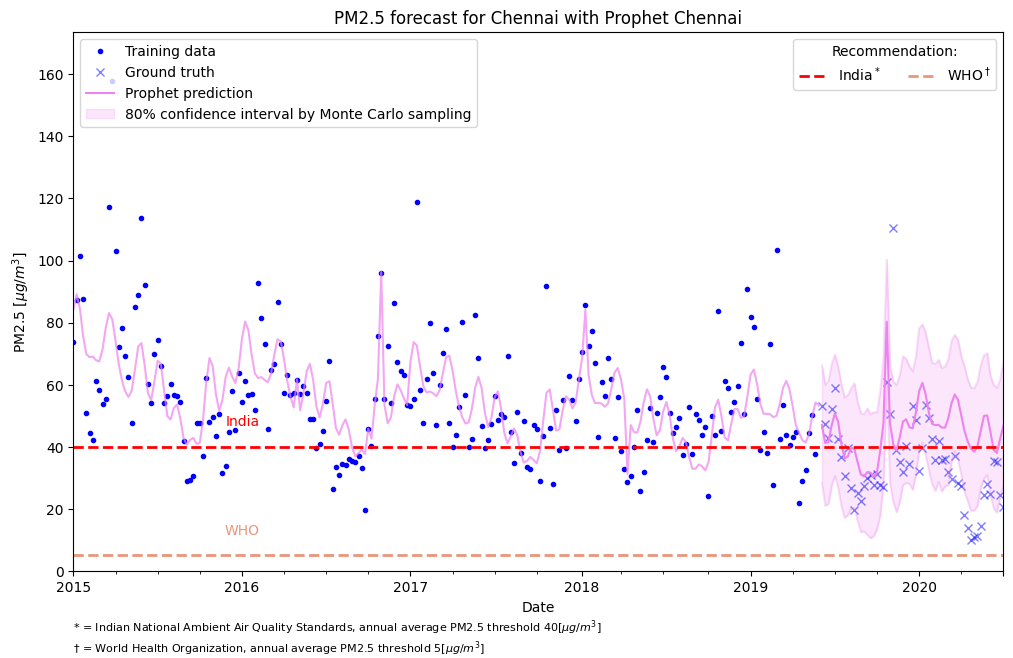

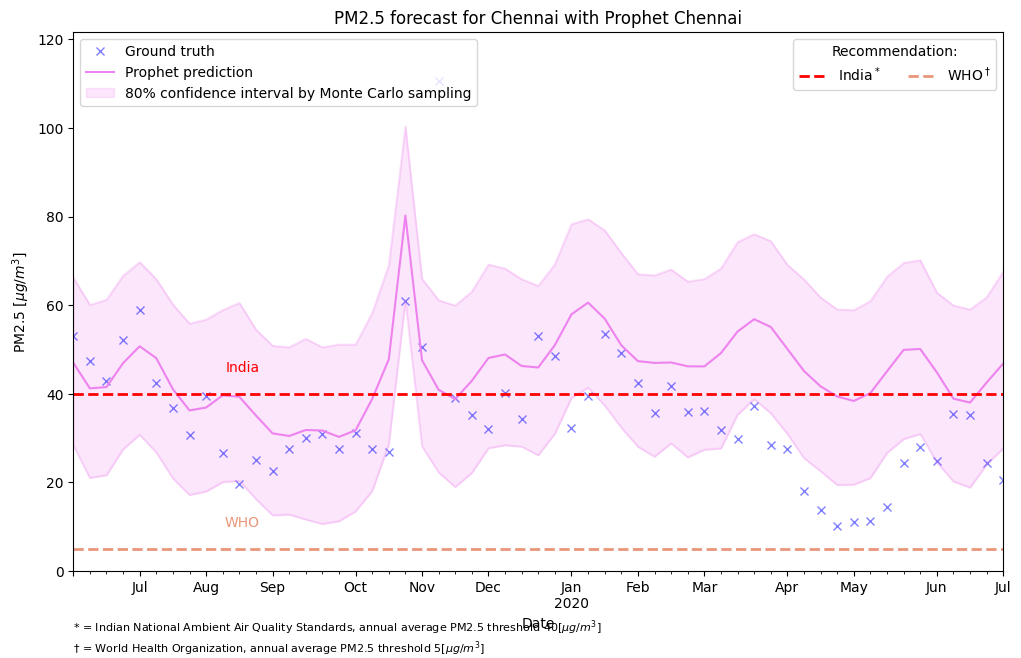

In [49]:
# Let's check the plot of the prediction

last_index_train = int(len(india_pollution_dataset.values) * (1 - test_split))
training_data = india_pollution_dataset.values[:last_index_train]

comparison_plot_figure = comparison_plot(
    training_data,
    prediction,
)

In [50]:
# Try with a foundational model: Holt-Winters

prediction = holt_winters(india_pollution_dataset)
metrics = get_metrics(prediction)

pprint.pprint(f"\n\nMetrics: {metrics}")

INFO:root:Holt-Winters Exponential Smoothing forecast


 > Model[['add', True, 'add', 51, True, True]] BIC=1554.0893382654085
 > Model[['add', True, 'add', 51, True, False]] BIC=1554.0893382654085
 > Model[['add', True, 'add', 51, False, True]] BIC=1542.5342766792014
 > Model[['add', True, 'add', 51, False, False]] BIC=1542.5342766792014
 > Model[['add', True, 'add', 52, True, True]] BIC=1528.5590485494117
 > Model[['add', True, 'add', 52, True, False]] BIC=1528.5590485494117
 > Model[['add', True, 'add', 52, False, True]] BIC=1523.8161590507543
 > Model[['add', True, 'add', 52, False, False]] BIC=1523.8161590507543
 > Model[['add', True, 'add', 53, True, True]] BIC=1598.5724024659576
 > Model[['add', True, 'add', 53, True, False]] BIC=1598.5724024659576
 > Model[['add', True, 'add', 53, False, True]] BIC=1586.0810847339276
 > Model[['add', True, 'add', 53, False, False]] BIC=1586.0810847339276
 > Model[['add', True, 'mul', 51, True, True]] BIC=1553.421817467622
 > Model[['add', True, 'mul', 51, True, False]] BIC=1553.421817467622
 > Model[

INFO:root:

Plotting Forecast for Indian city pollution PM2.5 using Holt-Winters Exponential Smoothing without pre-defined confidence intervals


INFO:root:

Plotting Forecast for Indian city pollution PM2.5 using Holt-Winters Exponential Smoothing without pre-defined confidence intervals




Saving comparison plot for Forecast for Indian city pollution PM2.5 using Holt-Winters Exponential Smoothing to Indian city pollution/Chennai/Holts-Winters-ES/PM2.5_forecast.png
Saving full plot for Forecast for Indian city pollution PM2.5 using Holt-Winters Exponential Smoothing to Indian city pollution/Chennai/Holts-Winters-ES/PM2.5_forecast.png


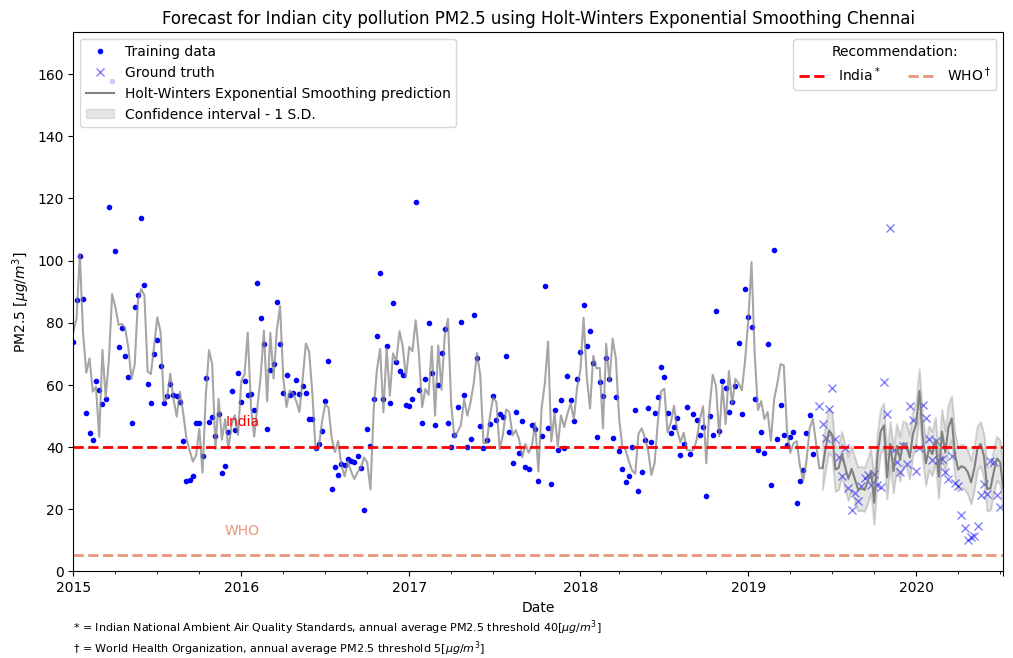

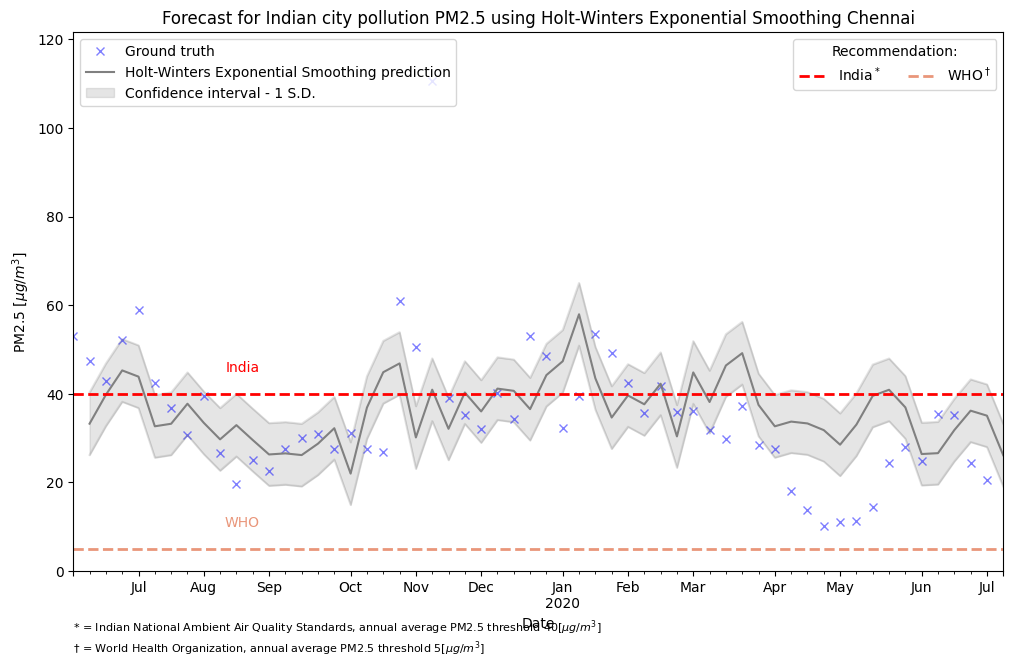

In [51]:
# plot the training data and the prediction

comparison_plot_figure = comparison_plot(
    training_data,
    prediction,
)
